# Carga de los datos y análisis preliminar

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, fligner, ranksums, mannwhitneyu
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score, balanced_accuracy_score
plt.style.use("ggplot")


In [2]:
data_path = '../data/heart.csv'
df = pd.read_csv(data_path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---
Analizamos el tipo de datos asignados, la proporción de valores nulos, dimensión del dataset y sus estadísticos descriptivos principales

In [3]:
print('Data type column:')
print(df.dtypes, '\n')

print('Missing values percentage:')
print(df.isna().sum() / len(df), '\n')

print('Dataset proportion: ', df.shape)

Data type column:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object 

Missing values percentage:
age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64 

Dataset proportion:  (303, 14)


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Los tipos de datos han quedado registrados correctamente y no hay valores nulos.

Se eliminan los valoes no registrados correctamente en la base de datos.

In [5]:
df.drop(index = (df[df["thall"] == 0].index.values), inplace=True)
df.drop(index = (df[df["caa"] == 4].index.values), inplace=True)
df.reset_index(drop=True, inplace=True)

---
# Analisis Exploratorio

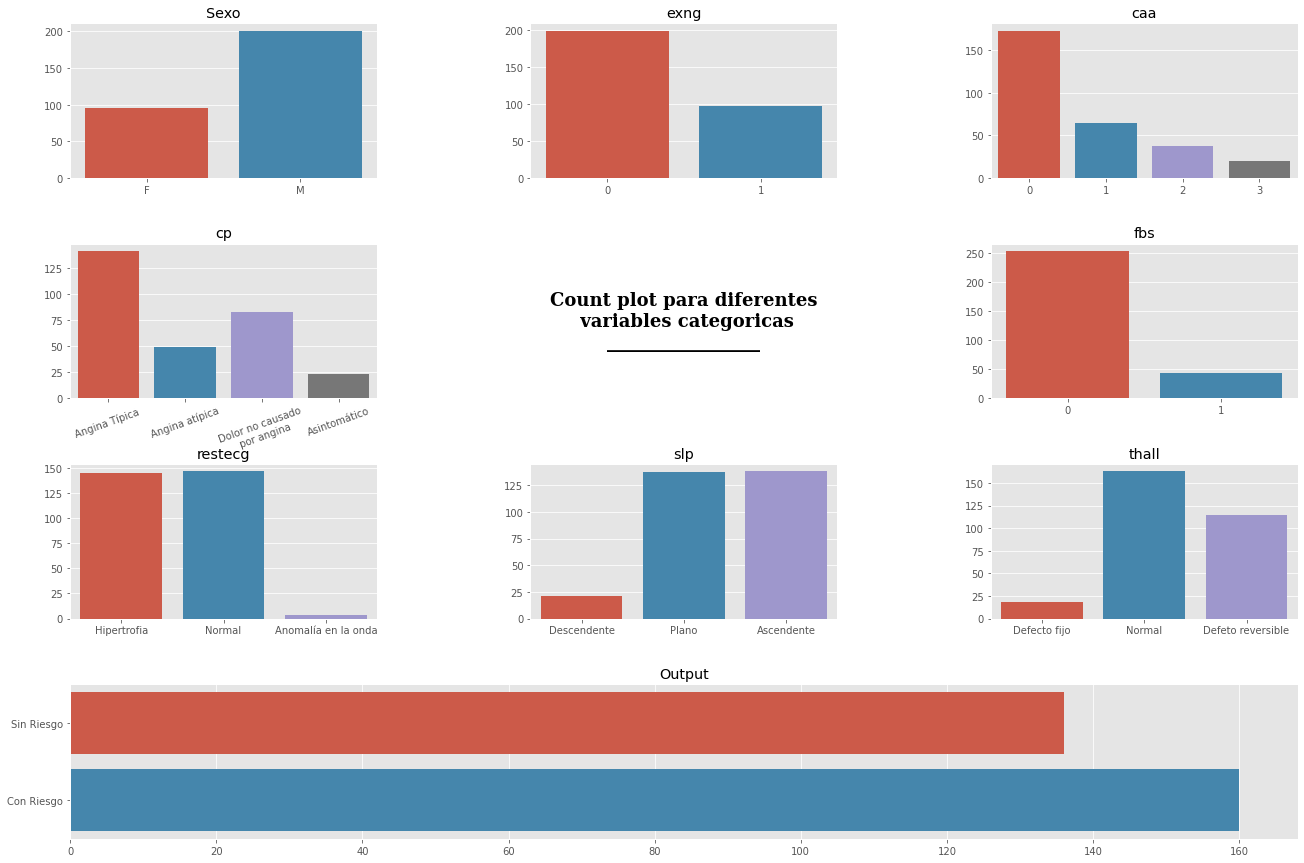

In [6]:
# Se instancia la figura, indicando el tamaño desado
fig_exp = plt.figure(figsize=(22, 15))

# Creamos dentro de la figura un grid personalizado
gs = fig_exp.add_gridspec(4,3)
gs.update(wspace=0.5, hspace=0.425)

# Generamos los subplots
ax0 = fig_exp.add_subplot(gs[0,0]) 
ax1 = fig_exp.add_subplot(gs[0,1])
ax2 = fig_exp.add_subplot(gs[0,2])
ax3 = fig_exp.add_subplot(gs[1,0])
ax4 = fig_exp.add_subplot(gs[1,1])
ax5 = fig_exp.add_subplot(gs[1,2])
ax6 = fig_exp.add_subplot(gs[2,0])
ax7 = fig_exp.add_subplot(gs[2,1])
ax8 = fig_exp.add_subplot(gs[2,2])
ax9 = fig_exp.add_subplot(gs[3,0:3])

# Titulo del centro
ax4.spines["bottom"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_facecolor("#ffffff") 
ax4.grid(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5,0.5,
         'Count plot para diferentes\n variables categoricas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


# Variable sex
sns.countplot(ax=ax0,data=df,x='sex')
ax0.set_title("Sexo")
ax0.set_xlabel("")
ax0.set_ylabel("")

sex_ind = [ "F", "M"]
x_indexes = np.arange(len(sex_ind))
ax0.set_xticks(ticks=x_indexes, labels=sex_ind)

# Variable Exng
sns.countplot(ax=ax1,data=df,x='exng')
ax1.set_title("exng")
ax1.set_xlabel("")
ax1.set_ylabel("")

# Variable Caa
sns.countplot(ax=ax2,data=df,x='caa')
ax2.set_title("caa")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Variable Cp
sns.countplot(ax=ax3,data=df,x='cp')
ax3.set_title("cp")
ax3.set_xlabel("")
ax3.set_ylabel("")
types_angina = [ "Angina Típica ", "Angina atípica", "Dolor no causado\n por angina", "Asintomático"]
x_indexes = np.arange(len(types_angina))
ax3.set_xticks(ticks=x_indexes, labels=types_angina, rotation=20)

# Variable Fbs
sns.countplot(ax=ax5,data=df,x='fbs')
ax5.set_title("fbs")
ax5.set_xlabel("")
ax5.set_ylabel("")

# Variable Restecg
sns.countplot(ax=ax6,data=df,x='restecg')
ax6.set_title("restecg")
ax6.set_xlabel("")
ax6.set_ylabel("")

types_restecg= ["Hipertrofia", "Normal", "Anomalía en la onda"]
x_indexes = np.arange(len(types_restecg))
ax6.set_xticks(ticks=x_indexes, labels=types_restecg, rotation=0)

# Variable Slp
sns.countplot(ax=ax7,data=df,x='slp')
ax7.set_title("slp")
ax7.set_xlabel("")
ax7.set_ylabel("")
types_slope = [ "Descendente", "Plano", "Ascendente"]
x_indexes = np.arange(len(types_slope))
ax7.set_xticks(ticks=x_indexes, labels=types_slope, rotation=0)

# Variable Thall
sns.countplot(ax=ax8,data=df,x='thall')
ax8.set_title("thall")
ax8.set_xlabel("")
ax8.set_ylabel("")

types_thall = [ "Defecto fijo", "Normal", "Defeto reversible"]
x_indexes = np.arange(len(types_thall))
ax8.set_xticks(ticks=x_indexes, labels=types_thall, rotation=0)

# Output
sns.countplot(ax=ax9, data=df, y = 'output')
ax9.set_title("Output")
ax9.set_xlabel("")
ax9.set_ylabel("")

types_Output = ["Sin Riesgo", "Con Riesgo"]
x_indexes = np.arange(len(types_Output))
ax9.set_yticks(ticks=x_indexes, labels=types_Output, rotation=0)

plt.show()

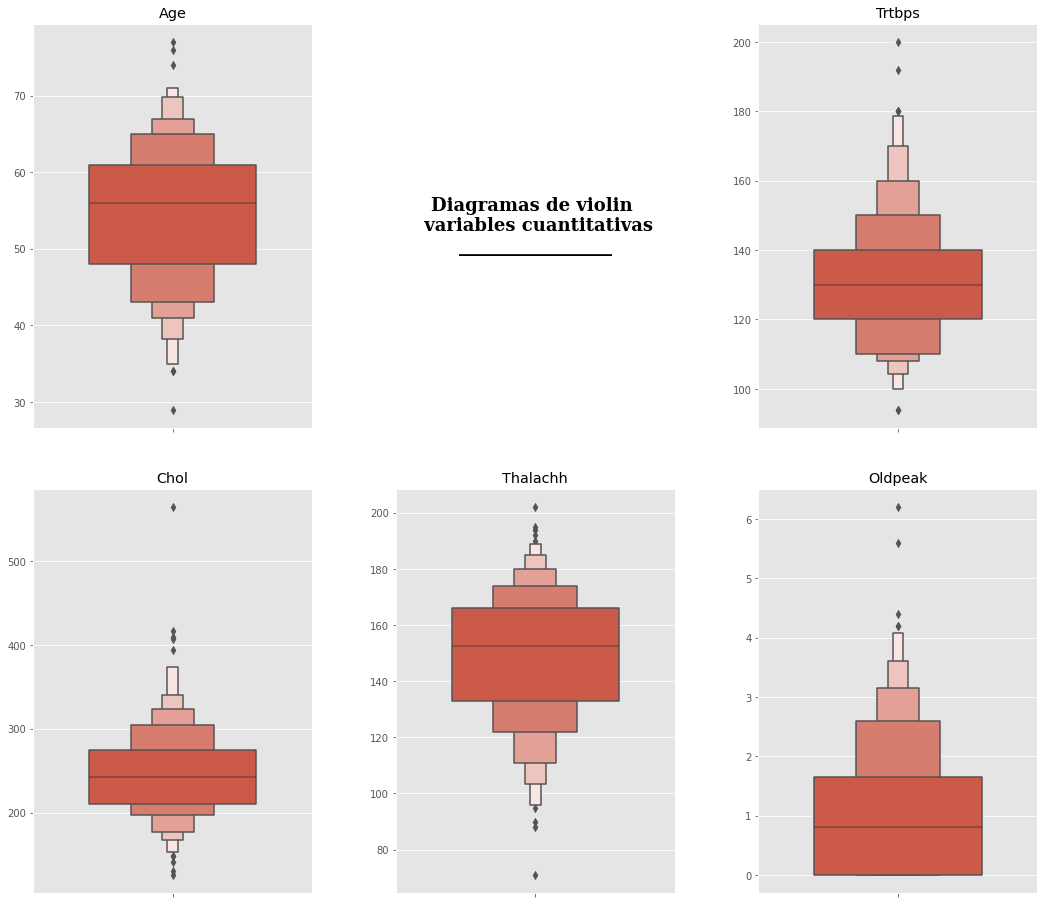

In [7]:
# Se instancia la figura, indicando el tamaño desado
fig = plt.figure(figsize=(18,16))

# Creamos dentro de la figura un grid personalizado
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)

# Generamos los subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


# Titulo del centro
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(left=False, bottom=False)
ax1.set_facecolor("#ffffff") 
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.text(0.5,0.5,
         'Diagramas de violin \n variables cuantitativas\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
sns.boxenplot(ax=ax0,y=df['age'],width=0.6)
ax0.set_ylabel("")
ax0.set_title("Age")



# trtbps
sns.boxenplot(ax=ax2,y=df['trtbps'],width=0.6)
ax2.set_ylabel("")
ax2.set_title("Trtbps")

# chol
sns.boxenplot(ax=ax3,y=df['chol'],width=0.6)
ax3.set_ylabel("")
ax3.set_title("Chol")

# thalachh
sns.boxenplot(ax=ax4,y=df['thalachh'],width=0.6)
ax4.set_ylabel("")
ax4.set_title("Thalachh")

# oldpeak
sns.boxenplot(ax=ax5,y=df['oldpeak'],width=0.6)
ax5.set_ylabel("")
ax5.set_title("Oldpeak")

plt.show()

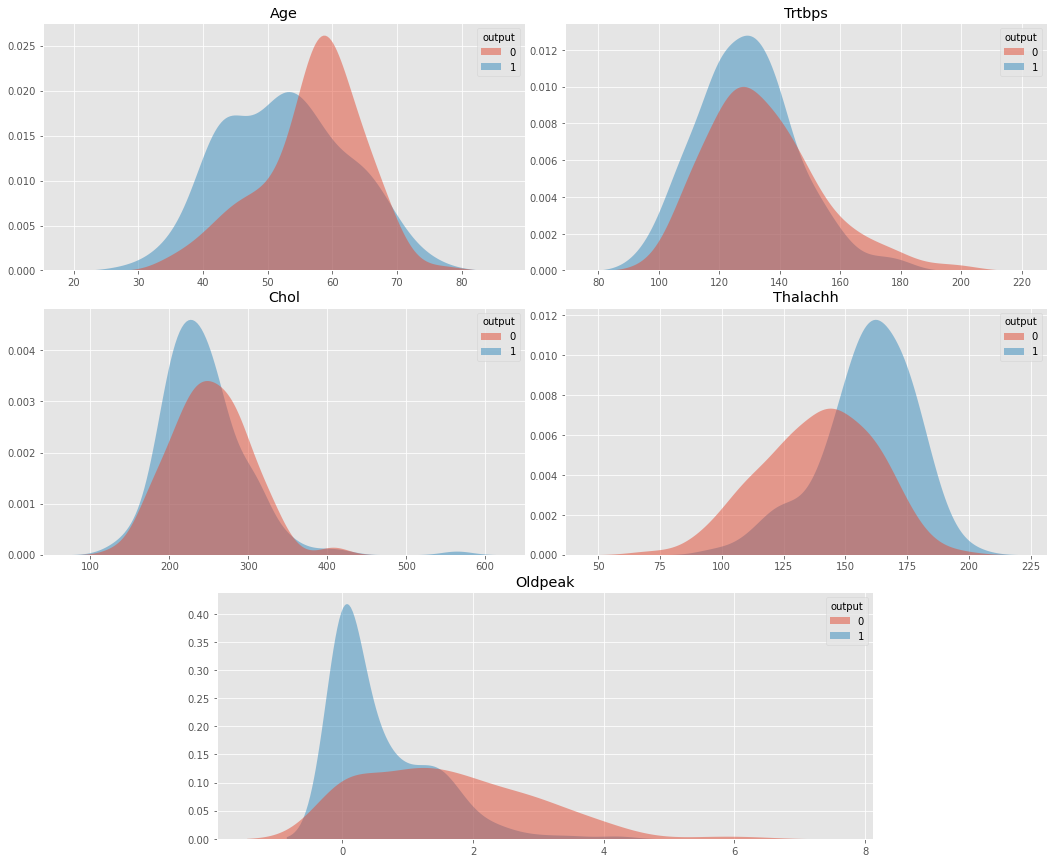

In [8]:
# Se instancia la figura, indicando el tamaño desado
fig = plt.figure(figsize=(18,15))

# Creamos dentro de la figura un grid personalizado
gs = fig.add_gridspec(3,6)
gs.update(wspace=0.3, hspace=0.15)

# Generamos los subplots
ax0 = fig.add_subplot(gs[0,0:3])
ax1 = fig.add_subplot(gs[0,3:6])
ax2 = fig.add_subplot(gs[1,0:3])
ax3 = fig.add_subplot(gs[1,3:6])
ax4 = fig.add_subplot(gs[2,1:5])

# age
sns.kdeplot(ax=ax0, data=df, x='age',hue="output", fill=True, alpha=.5, linewidth=0)
ax0.set_ylabel("")
ax0.set_xlabel("")
ax0.set_title("Age")

# trtbps
sns.kdeplot(ax=ax1, data=df, x='trtbps',hue="output", fill=True, alpha=.5, linewidth=0)
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_title("Trtbps")

# chol
sns.kdeplot(ax=ax2, data=df, x='chol',hue="output", fill=True, alpha=.5, linewidth=0)
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_title("Chol")

# thalachh
sns.kdeplot(ax=ax3, data=df, x='thalachh',hue="output", fill=True, alpha=.5, linewidth=0)
ax3.set_ylabel("")
ax3.set_xlabel("")
ax3.set_title("Thalachh")

# oldpeak
sns.kdeplot(ax=ax4, data=df, x='oldpeak',hue="output", fill=True, alpha=.5, linewidth=0)
ax4.set_ylabel("")
ax4.set_xlabel("")
ax4.set_title("Oldpeak")

plt.show()


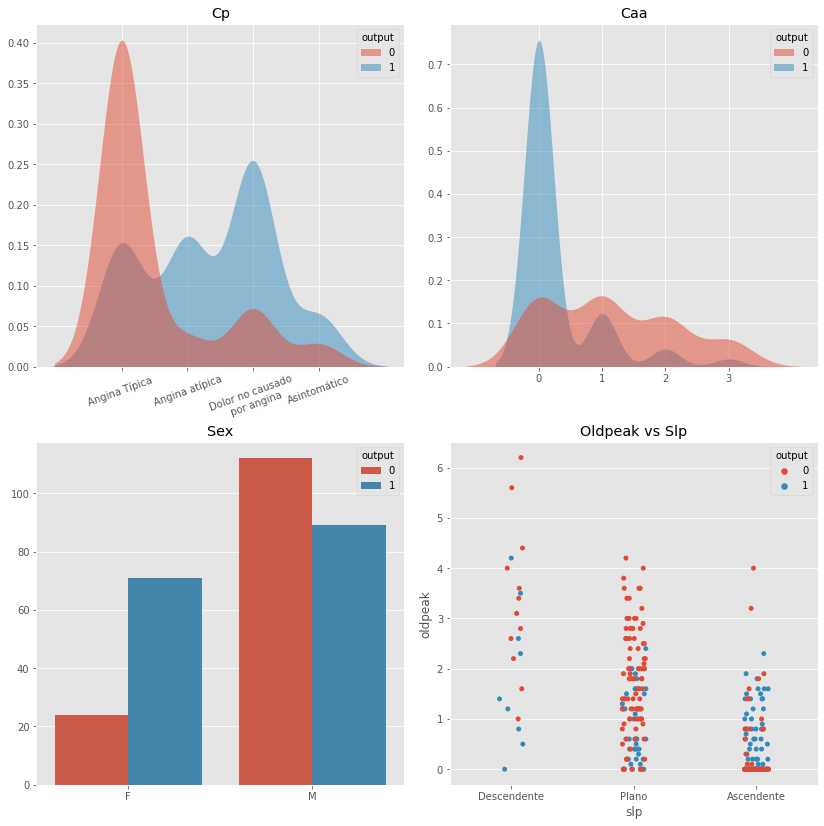

In [9]:
# Se instancia la figura, indicando el tamaño desado
fig = plt.figure(figsize=(14,14))

# Creamos dentro de la figura un grid personalizado
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.125, hspace=0.22)

# Generamos los subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

# Cp
sns.kdeplot(ax=ax0, data=df, x='cp',hue="output", fill=True, alpha=.5, linewidth=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title("Cp")

types_angina = [ "Angina Típica ", "Angina atípica", "Dolor no causado\n por angina", "Asintomático"]
x_indexes = np.arange(len(types_angina))
ax0.set_xticks(ticks=x_indexes, labels=types_angina, rotation=20)

# Caa
sns.kdeplot(ax=ax1, data=df, x='caa',hue="output", fill=True, alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title("Caa")

num_vessels = [ "0", "1", "2", "3"]
x_indexes = np.arange(len(num_vessels))
ax1.set_xticks(ticks=x_indexes, labels=num_vessels)

# Sex
sns.countplot(ax=ax2,data=df,x='sex', hue='output')
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("Sex")

sex_ind = [ "F", "M"]
x_indexes = np.arange(len(sex_ind))
ax2.set_xticks(ticks=x_indexes, labels=sex_ind)


# oldpeak vs slp
sns.stripplot(ax=ax3, data=df,x='slp',y='oldpeak',hue='output')
ax3.set_title("Oldpeak vs Slp")
types_slope = [ "Descendente", "Plano", "Ascendente"]
x_indexes = np.arange(len(types_slope))
ax3.set_xticks(ticks=x_indexes, labels=types_slope, rotation=0)

plt.show()



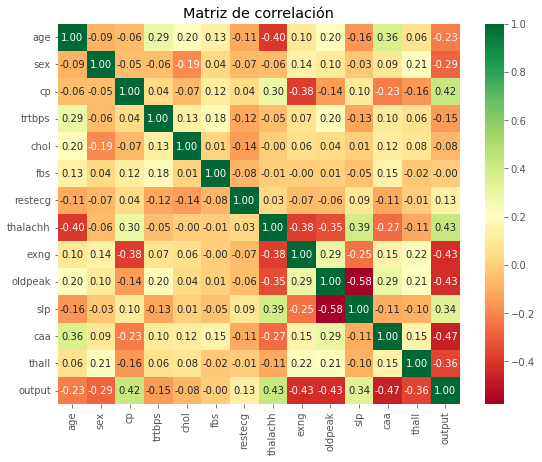

In [10]:
df_corr = df.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(df_corr, annot= True, cmap='RdYlGn', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

---
# Preprocesamiento

In [11]:
# Se define las variables categoricas y numéricas
categorical_columns = ['sex','cp','fbs', 'restecg','exng', 'slp','caa', 'thall']
numerical_columns = ['age','trtbps','chol','thalachh','oldpeak']

# Se generan los dummies de las variables
df_prep = pd.get_dummies(df, columns=categorical_columns, drop_first = True)

# Se normalizan los valores
scaler = RobustScaler()
df_prep[numerical_columns] = scaler.fit_transform(df_prep[numerical_columns])

In [12]:
# Se verifica la normalidad de las muestras
print('Test de Saphiro-Wilk:\nH0:X[column] Se distribuye como una Normal\n')
for column in numerical_columns:
  stat, p = shapiro(df_prep[column])
  print(f'Variable: {column}\nEstadístico de prueba: {stat}\np-valor: {p}\n{"-"*30}')

Test de Saphiro-Wilk:
H0:X[column] Se distribuye como una Normal

Variable: age
Estadístico de prueba: 0.9861545562744141
p-valor: 0.006043082568794489
------------------------------
Variable: trtbps
Estadístico de prueba: 0.9659498929977417
p-valor: 1.913372670969693e-06
------------------------------
Variable: chol
Estadístico de prueba: 0.9476287364959717
p-valor: 8.983809252072206e-09
------------------------------
Variable: thalachh
Estadístico de prueba: 0.9769901633262634
p-valor: 0.00010728326014941558
------------------------------
Variable: oldpeak
Estadístico de prueba: 0.8491988182067871
p-valor: 2.500604843532633e-16
------------------------------


In [13]:
# Se verifica la homocedasticidad
print("Test de Fligner:\nH0:df[column] tiene varianza constante\n")
for column in numerical_columns:
  group0 = df_prep[column][df_prep['output']==0]
  group1 = df_prep[column][df_prep['output']==1]
  stat, p_value = fligner(group0, group1)

  print(f'Variable: {column}\nEstadístico de prueba: {stat}\np-valor: {p_value}\n{"-"*30}')

Test de Fligner:
H0:df[column] tiene varianza constante

Variable: age
Estadístico de prueba: 7.8943663198185945
p-valor: 0.004958900816638018
------------------------------
Variable: trtbps
Estadístico de prueba: 1.2389301954746632
p-valor: 0.265677330888321
------------------------------
Variable: chol
Estadístico de prueba: 0.601953740523218
p-valor: 0.43783355502037113
------------------------------
Variable: thalachh
Estadístico de prueba: 6.134593179032346
p-valor: 0.013256204457396455
------------------------------
Variable: oldpeak
Estadístico de prueba: 29.62204228719717
p-valor: 5.25044695705278e-08
------------------------------


In [14]:
# Comparacion entre dos grupos de datos con igualdad de varianza
print("Test de Wilcoxon:\nH0:df[column] tienen la misma media\n")

group0 = df_prep["trtbps"][df_prep['output']==0]
group1 = df_prep["trtbps"][df_prep['output']==1]
stat, p_value = ranksums(group0, group1)
print(f'Variable: {column}\nEstadístico de prueba: {stat}\np-valor: {p_value}\n{"-"*30}')

group0 = df_prep["chol"][df_prep['output']==0]
group1 = df_prep["chol"][df_prep['output']==1]
stat, p_value = ranksums(group0, group1)

print(f'Variable: {column}\nEstadístico de prueba: {stat}\np-valor: {p_value}\n{"-"*30}')

Test de Wilcoxon:
H0:df[column] tienen la misma media

Variable: oldpeak
Estadístico de prueba: 2.175463873912039
p-valor: 0.029595372469654404
------------------------------
Variable: oldpeak
Estadístico de prueba: 1.914517220699289
p-valor: 0.055554100909492546
------------------------------


In [15]:
# Comparacion entre dos grupos de datos independientes
print("Test de  Mann-Whitney:\nH0:df[column] tienen la misma media\n")

group0 = df_prep["age"][df_prep['output']==0]
group1 = df_prep["age"][df_prep['output']==1]
stat, p_value = mannwhitneyu(group0, group1)
print(f'Variable: {column}\nEstadístico de prueba: {stat}\np-valor: {p_value}\n{"-"*30}')

group0 = df_prep["thalachh"][df_prep['output']==0]
group1 = df_prep["thalachh"][df_prep['output']==1]
stat, p_value = mannwhitneyu(group0, group1)
print(f'Variable: {column}\nEstadístico de prueba: {stat}\np-valor: {p_value}\n{"-"*30}')

group0 = df_prep["oldpeak"][df_prep['output']==0]
group1 = df_prep["oldpeak"][df_prep['output']==1]
stat, p_value = mannwhitneyu(group0, group1)

print(f'Variable: {column}\nEstadístico de prueba: {stat}\np-valor: {p_value}\n{"-"*30}')

Test de  Mann-Whitney:
H0:df[column] tienen la misma media

Variable: oldpeak
Estadístico de prueba: 13880.0
p-valor: 4.314368327340408e-05
------------------------------
Variable: oldpeak
Estadístico de prueba: 5441.5
p-valor: 1.2510261737814523e-13
------------------------------
Variable: oldpeak
Estadístico de prueba: 16051.5
p-valor: 7.574322153021749e-13
------------------------------


---
# Modelos

In [16]:
def model_results(df) -> dict:

    dict_results = {}

    y_tests = []
    y_preds_bin = []
    y_preds = []

    acc_log = []
    coef_log = []
    
    
    X = df.drop('output' ,axis=1)
    y = df['output']
    
    kf = model_selection.StratifiedKFold(n_splits=8, shuffle=True)
    
    for fold, (trn_, val_) in enumerate(kf.split(X,y)):
        X_train =X.loc[trn_,] # Datos de entrenamiento de las varibles independientes
        y_train=y.loc[trn_,]  # Datos de entrenamiento de las variables dependientes
        
        X_test = X.loc[val_,] # Datos de validación de las varibles independientes
        y_test = y.loc[val_,] # Datos de validación de las variables dependientes

        clf=LogisticRegression(max_iter=10000) # Instancia del modelo de regresión logistica
        clf.fit(X_train, y_train) # Se entrena el modelo

        y_pred_bin = clf.predict(X_test) # Se obtiene las predicciones
        y_pred = clf.predict_proba(X_test) # Se obtiene las probabilidades de la predicciones
        y_pred = [item[1] for item in y_pred]
        y_tests.extend(y_test.values)
        y_preds_bin.extend(y_pred_bin)
        y_preds.extend(y_pred)
        acc_log.append(balanced_accuracy_score(y_test,y_pred_bin))
        coef_log.append(clf.coef_)
        
        
    # Se guardan los resultados
    dict_results['y_test']=y_tests
    dict_results['y_pred_bin'] = y_preds_bin
    dict_results['y_pred']=y_preds
    # balanced accuracy medio
    dict_results['acc_avg'] = np.mean(acc_log)
    # Coeficientes del modelo
    dict_results['coef_log'] = np.mean(coef_log, axis=0) 

    return dict_results

In [17]:
# Modelo sin preprocesar
pred0=model_results(df)
# Modelo preprocesado
pred1=model_results(df_prep)

acc0 = pred0['acc_avg']
acc1 = pred1['acc_avg']


---
# Resultados

In [18]:
print(f'La exactitud del modelo entrenado sin preprocesar los datos es: {acc0}')
print(f'La exactitud del modelo entrenado con los datos preprocesados es: {acc1}')

La exactitud del modelo entrenado sin preprocesar los datos es: 0.8454044117647059
La exactitud del modelo entrenado con los datos preprocesados es: 0.8314338235294118


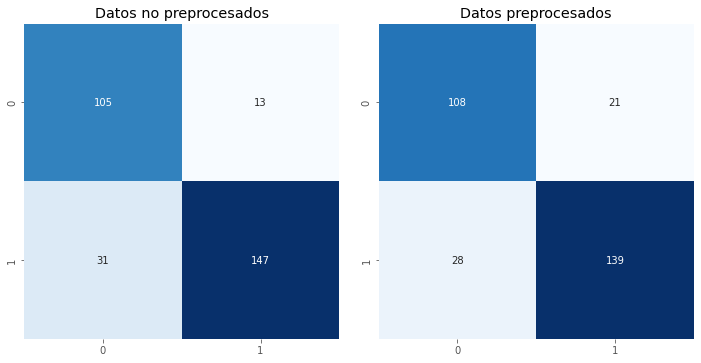

In [19]:
# Se calculan las matrices de confusion
conf_matrix0 = confusion_matrix(pred0['y_test'], pred0['y_pred_bin'])
conf_matrix1 = confusion_matrix(pred1['y_test'], pred1['y_pred_bin'])

# Se instancia la figura, indicando el tamaño desado
fig = plt.figure(figsize=(12,10))

# Creamos dentro de la figura un grid personalizado
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.125)

# Generamos los subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])



# Datos no procesados
sns.heatmap(ax=ax0,data=conf_matrix0.T, square=True, annot=True, cbar=False, cmap='Blues',fmt='d')
ax0.set_title("Datos no preprocesados")

# Datos procesados
sns.heatmap(ax=ax1,data=conf_matrix1.T, square=True, annot=True, cbar=False, cmap='Blues',fmt='d')
ax1.set_title("Datos preprocesados")

plt.show()

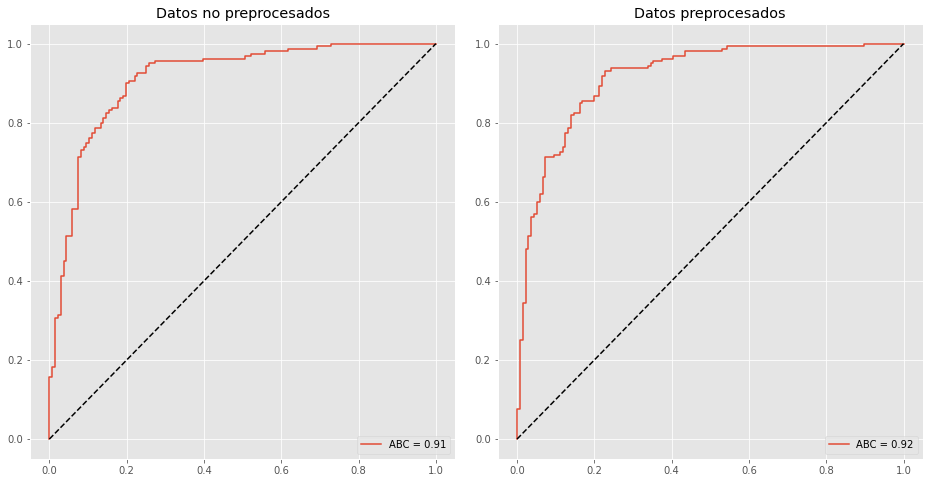

In [20]:
# Se calculan las curvas ROC
fpr0, tpr0, thresholds0 = roc_curve(pred0['y_test'], pred0['y_pred'])
fpr1, tpr1, thresholds1 = roc_curve(pred1['y_test'], pred1['y_pred'])

# Se calcula el AUC
roc_auc0 = auc(fpr0, tpr0)
roc_auc1 = auc(fpr1, tpr1)

# Se instancia la figura, indicando el tamaño desado
fig = plt.figure(figsize=(16,8))

# Creamos dentro de la figura un grid personalizado
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.1)

# Generamos los subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# Datos no preprocesados
ax0.plot(fpr0, tpr0, label=f'ABC = {roc_auc0:.2f}')
ax0.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line

ax0.legend(loc='lower right')
ax0.set_title("Datos no preprocesados")

# Datos preprocesados
ax1.plot(fpr1, tpr1, label=f'ABC = {roc_auc1:.2f}')
ax1.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line

ax1.legend(loc='lower right')
ax1.set_title("Datos preprocesados")


plt.show()